In [1]:
import pandas as pd

In [2]:
birddata = pd.read_csv("bird_tracking.csv")

In [3]:
birddata

,Unnamed: 0,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
0,0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric
1,1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric
2,2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric
3,3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric
4,4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric
...,...,...,...,...,...,...,...,...,...
61915,61915,11,2014-04-30 22:00:08+00,833,45.448157,51.352572,3.177151,0.208087,Sanne
61916,61916,6,2014-04-30 22:29:57+00,833,-112.073055,51.352585,3.177144,1.522662,Sanne
61917,61917,5,2014-04-30 22:59:52+00,833,69.989037,51.352622,3.177257,3.120545,Sanne
61918,61918,16,2014-04-30 23:29:43+00,833,88.376373,51.354641,3.181509,0.592115,Sanne


In [4]:
bird_names = pd.unique(birddata.bird_name)

In [5]:
bird_names

array(['Eric', 'Nico', 'Sanne'], dtype=object)

In [6]:
import matplotlib.pyplot as plt

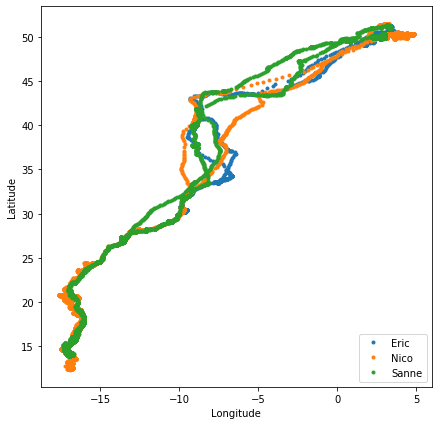

In [7]:
plt.figure(figsize=(7,7))
for bird_name in bird_names:
    ix = birddata.bird_name == bird_name
    x, y = birddata.longitude[ix], birddata.latitude[ix]
    plt.plot(x,y,".", label=bird_name)
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.legend(loc="lower right")
    plt.savefig("3traj.pdf")

In [8]:
ix = birddata.bird_name == "Eric"

In [9]:
speed = birddata.speed_2d[ix]

C:\Users\SHRIYU\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\SHRIYU\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([1.7732e+04, 1.5020e+03, 3.6900e+02, 7.8000e+01, 1.2000e+01,
        7.0000e+00, 3.0000e+00, 2.0000e+00, 3.0000e+00, 2.0000e+00]),
 array([ 0.        ,  6.34880658, 12.69761316, 19.04641974, 25.39522632,
        31.7440329 , 38.09283948, 44.44164607, 50.79045265, 57.13925923,
        63.48806581]),
 <a list of 10 Patch objects>)

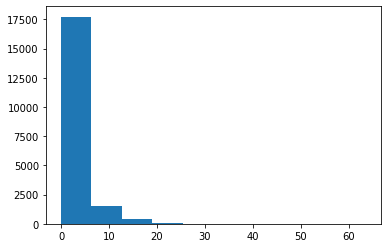

In [10]:
plt.hist(speed)

In [11]:
import numpy as np
np.isnan(speed)

0        False
1        False
2        False
3        False
4        False
         ...  
19790    False
19791    False
19792    False
19793    False
19794    False
Name: speed_2d, Length: 19795, dtype: bool

In [12]:
np.isnan(speed).any()

True

In [13]:
sum(np.isnan(speed))

85

In [14]:
np.sum(np.isnan(speed))

85

In [15]:
ind = np.isnan(speed)

In [16]:
ind

0        False
1        False
2        False
3        False
4        False
         ...  
19790    False
19791    False
19792    False
19793    False
19794    False
Name: speed_2d, Length: 19795, dtype: bool

In [17]:
~ind

0        True
1        True
2        True
3        True
4        True
         ... 
19790    True
19791    True
19792    True
19793    True
19794    True
Name: speed_2d, Length: 19795, dtype: bool

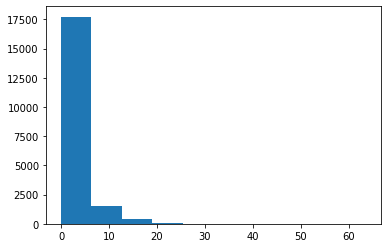

In [18]:
ix = birddata.bird_name == "Eric"
speed = birddata.speed_2d[ix]
ind = np.isnan(speed)
plt.hist(speed[~ind])
plt.savefig("hist.pdf")

C:\Users\SHRIYU\anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


Text(0, 0.5, 'Frequency')

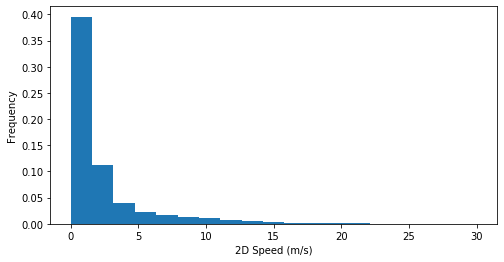

In [19]:
plt.figure(figsize=(8,4))
speed = birddata.speed_2d[birddata.bird_name == "Eric"]
ind = np.isnan(speed)
plt.hist(speed[~ind], bins = np.linspace(0, 30, 20), normed = True)
plt.xlabel("2D Speed (m/s)")
plt.ylabel("Frequency")

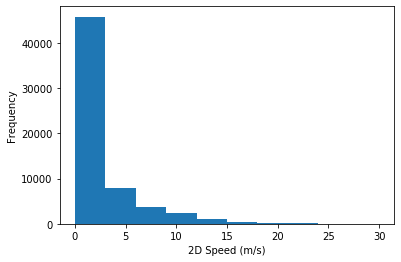

In [20]:
birddata.speed_2d.plot(kind = "hist", range= [0, 30])
plt.xlabel("2D Speed (m/s)")
plt.savefig("pd_hist.pdf")

In [21]:
speed

0        0.150000
1        2.438360
2        0.596657
3        0.310161
4        0.193132
           ...   
19790    0.064031
19791    1.942395
19792    1.678392
19793    0.208087
19794    0.056569
Name: speed_2d, Length: 19795, dtype: float64

In [22]:
birddata

,Unnamed: 0,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
0,0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric
1,1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric
2,2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric
3,3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric
4,4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric
...,...,...,...,...,...,...,...,...,...
61915,61915,11,2014-04-30 22:00:08+00,833,45.448157,51.352572,3.177151,0.208087,Sanne
61916,61916,6,2014-04-30 22:29:57+00,833,-112.073055,51.352585,3.177144,1.522662,Sanne
61917,61917,5,2014-04-30 22:59:52+00,833,69.989037,51.352622,3.177257,3.120545,Sanne
61918,61918,16,2014-04-30 23:29:43+00,833,88.376373,51.354641,3.181509,0.592115,Sanne


In [23]:
birddata.columns

Index(['Unnamed: 0', 'altitude', 'date_time', 'device_info_serial',
       'direction', 'latitude', 'longitude', 'speed_2d', 'bird_name'],
      dtype='object')

In [24]:
birddata.date_time[0:3]

0    2013-08-15 00:18:08+00
1    2013-08-15 00:48:07+00
2    2013-08-15 01:17:58+00
Name: date_time, dtype: object

In [25]:
import datetime

In [26]:
datetime.datetime.today()

datetime.datetime(2020, 10, 17, 12, 11, 6, 589527)

In [27]:
time_1 = datetime.datetime.today()

In [28]:
time_2 = datetime.datetime.today()

In [29]:
time_2 - time_1

datetime.timedelta(microseconds=33829)

In [30]:
date_str = birddata.date_time[0]

In [31]:
type(date_str)

str

In [32]:
date_str[:-3]

'2013-08-15 00:18:08'

In [33]:
datetime.datetime.strptime(date_str[:-3], "%Y-%m-%d %H:%M:%S")

datetime.datetime(2013, 8, 15, 0, 18, 8)

In [34]:
timestamps = []

for k in range(len(birddata)):
    timestamps.append(datetime.datetime.strptime(birddata.date_time[k][:-3], "%Y-%m-%d %H:%M:%S"))

In [35]:
timestamps

[datetime.datetime(2013, 8, 15, 0, 18, 8),
 datetime.datetime(2013, 8, 15, 0, 48, 7),
 datetime.datetime(2013, 8, 15, 1, 17, 58),
 datetime.datetime(2013, 8, 15, 1, 47, 51),
 datetime.datetime(2013, 8, 15, 2, 17, 42),
 datetime.datetime(2013, 8, 15, 2, 47, 38),
 datetime.datetime(2013, 8, 15, 3, 2, 33),
 datetime.datetime(2013, 8, 15, 3, 17, 27),
 datetime.datetime(2013, 8, 15, 3, 32, 35),
 datetime.datetime(2013, 8, 15, 3, 47, 48),
 datetime.datetime(2013, 8, 15, 4, 3, 39),
 datetime.datetime(2013, 8, 15, 4, 18, 40),
 datetime.datetime(2013, 8, 15, 4, 33, 53),
 datetime.datetime(2013, 8, 15, 4, 49, 6),
 datetime.datetime(2013, 8, 15, 5, 4, 45),
 datetime.datetime(2013, 8, 15, 5, 20, 9),
 datetime.datetime(2013, 8, 15, 5, 35, 4),
 datetime.datetime(2013, 8, 15, 5, 49, 58),
 datetime.datetime(2013, 8, 15, 6, 4, 56),
 datetime.datetime(2013, 8, 15, 6, 19, 54),
 datetime.datetime(2013, 8, 15, 6, 34, 50),
 datetime.datetime(2013, 8, 15, 6, 49, 43),
 datetime.datetime(2013, 8, 15, 7, 4, 40)

In [36]:
birddata["timestamp"] = pd.Series(timestamps, index = birddata.index)

In [37]:
birddata.head

<bound method NDFrame.head of        Unnamed: 0  altitude               date_time  device_info_serial  \
0               0        71  2013-08-15 00:18:08+00                 851   
1               1        68  2013-08-15 00:48:07+00                 851   
2               2        68  2013-08-15 01:17:58+00                 851   
3               3        73  2013-08-15 01:47:51+00                 851   
4               4        69  2013-08-15 02:17:42+00                 851   
...           ...       ...                     ...                 ...   
61915       61915        11  2014-04-30 22:00:08+00                 833   
61916       61916         6  2014-04-30 22:29:57+00                 833   
61917       61917         5  2014-04-30 22:59:52+00                 833   
61918       61918        16  2014-04-30 23:29:43+00                 833   
61919       61919         9  2014-04-30 23:59:34+00                 833   

        direction   latitude  longitude  speed_2d bird_name  \
0     

In [38]:
birddata

,Unnamed: 0,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name,timestamp
0,0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric,2013-08-15 00:18:08
1,1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric,2013-08-15 00:48:07
2,2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric,2013-08-15 01:17:58
3,3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric,2013-08-15 01:47:51
4,4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric,2013-08-15 02:17:42
...,...,...,...,...,...,...,...,...,...,...
61915,61915,11,2014-04-30 22:00:08+00,833,45.448157,51.352572,3.177151,0.208087,Sanne,2014-04-30 22:00:08
61916,61916,6,2014-04-30 22:29:57+00,833,-112.073055,51.352585,3.177144,1.522662,Sanne,2014-04-30 22:29:57
61917,61917,5,2014-04-30 22:59:52+00,833,69.989037,51.352622,3.177257,3.120545,Sanne,2014-04-30 22:59:52
61918,61918,16,2014-04-30 23:29:43+00,833,88.376373,51.354641,3.181509,0.592115,Sanne,2014-04-30 23:29:43


In [39]:
times = birddata.timestamp[birddata.bird_name == "Eric"]
elapsed_time = [time - times[0] for time in times]

In [40]:
elapsed_time

[Timedelta('0 days 00:00:00'),
 Timedelta('0 days 00:29:59'),
 Timedelta('0 days 00:59:50'),
 Timedelta('0 days 01:29:43'),
 Timedelta('0 days 01:59:34'),
 Timedelta('0 days 02:29:30'),
 Timedelta('0 days 02:44:25'),
 Timedelta('0 days 02:59:19'),
 Timedelta('0 days 03:14:27'),
 Timedelta('0 days 03:29:40'),
 Timedelta('0 days 03:45:31'),
 Timedelta('0 days 04:00:32'),
 Timedelta('0 days 04:15:45'),
 Timedelta('0 days 04:30:58'),
 Timedelta('0 days 04:46:37'),
 Timedelta('0 days 05:02:01'),
 Timedelta('0 days 05:16:56'),
 Timedelta('0 days 05:31:50'),
 Timedelta('0 days 05:46:48'),
 Timedelta('0 days 06:01:46'),
 Timedelta('0 days 06:16:42'),
 Timedelta('0 days 06:31:35'),
 Timedelta('0 days 06:46:32'),
 Timedelta('0 days 07:01:27'),
 Timedelta('0 days 07:16:23'),
 Timedelta('0 days 07:31:21'),
 Timedelta('0 days 07:46:48'),
 Timedelta('0 days 08:01:44'),
 Timedelta('0 days 08:16:39'),
 Timedelta('0 days 08:31:43'),
 Timedelta('0 days 08:46:55'),
 Timedelta('0 days 09:01:59'),
 Timedel

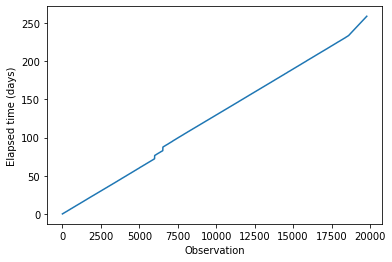

In [41]:
plt.plot(np.array(elapsed_time) / datetime.timedelta(days = 1))
plt.xlabel("Observation")
plt.ylabel("Elapsed time (days)")
plt.savefig("timeplot.pdf")

In [44]:
elapsed_days = np.array(elapsed_time) / datetime.timedelta(days = 1)

In [48]:
print(list(enumerate(elapsed_days))[0:10])

[(0, 0.0), (1, 0.02082175925925926), (2, 0.04155092592592593), (3, 0.06230324074074074), (4, 0.0830324074074074), (5, 0.10381944444444445), (6, 0.11417824074074075), (7, 0.12452546296296296), (8, 0.1350347222222222), (9, 0.14560185185185184)]


In [49]:
elapsed_time[:10]

[Timedelta('0 days 00:00:00'),
 Timedelta('0 days 00:29:59'),
 Timedelta('0 days 00:59:50'),
 Timedelta('0 days 01:29:43'),
 Timedelta('0 days 01:59:34'),
 Timedelta('0 days 02:29:30'),
 Timedelta('0 days 02:44:25'),
 Timedelta('0 days 02:59:19'),
 Timedelta('0 days 03:14:27'),
 Timedelta('0 days 03:29:40')]

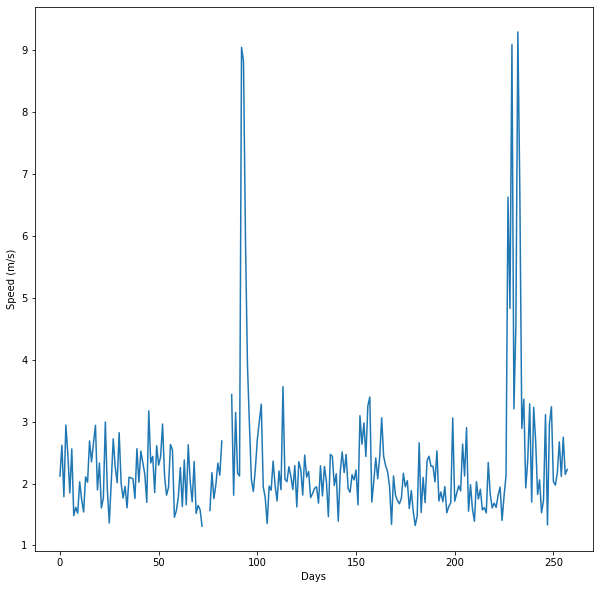

In [60]:
data = birddata[birddata.bird_name == "Eric"]
times = data.timestamp
elapsed_time = [time - times[0] for time in times]
elapsed_days = np.array(elapsed_time) / datetime.timedelta(days = 1)


next_days = 1
inds = []
daily_mean_speed = []
for i,t in enumerate(elapsed_days):
    if t < next_days:
        inds.append(i)
    else:
        daily_mean_speed.append(np.mean(data.speed_2d[inds]))
        next_days += 1
        inds = []
        
plt.figure(figsize=(10,10))
plt.plot(daily_mean_speed)
plt.xlabel("Days")
plt.ylabel("Speed (m/s)")
plt.savefig("Eric_speed.pdf")

In [69]:
data_2 = birddata[birddata.bird_name == "Sanne"]

In [71]:
data_2.timestamp

40916   2013-08-15 00:01:08
40917   2013-08-15 00:31:00
40918   2013-08-15 01:01:19
40919   2013-08-15 01:31:38
40920   2013-08-15 02:01:24
                ...        
61915   2014-04-30 22:00:08
61916   2014-04-30 22:29:57
61917   2014-04-30 22:59:52
61918   2014-04-30 23:29:43
61919   2014-04-30 23:59:34
Name: timestamp, Length: 21004, dtype: datetime64[ns]

In [66]:
times

0       2013-08-15 00:18:08
1       2013-08-15 00:48:07
2       2013-08-15 01:17:58
3       2013-08-15 01:47:51
4       2013-08-15 02:17:42
                ...        
19790   2014-04-30 21:51:26
19791   2014-04-30 22:21:33
19792   2014-04-30 22:51:41
19793   2014-04-30 23:21:34
19794   2014-04-30 23:51:29
Name: timestamp, Length: 19795, dtype: datetime64[ns]

In [72]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

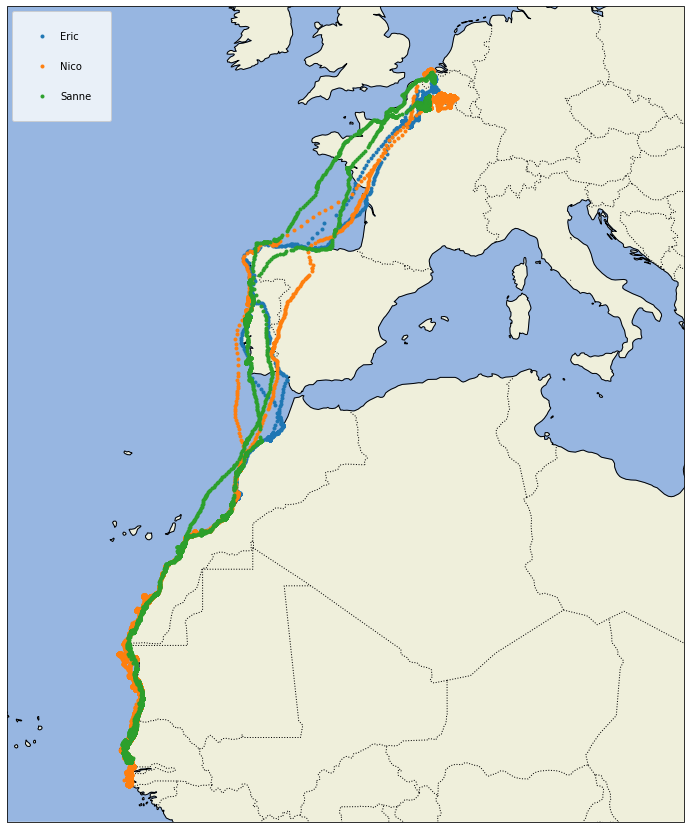

In [91]:
proj = ccrs.Mercator()
plt.figure(figsize=(15,15))
ax = plt.axes(projection=proj)
ax.set_extent((-25.0, 20.0, 52.0, 10))

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=":")

for name in bird_names:
    ix = birddata["bird_name"] == name
    x, y = birddata.longitude[ix], birddata.latitude[ix]
    ax.plot(x, y, ".", transform =  ccrs.Geodetic(), label = name)
plt.legend(loc = "upper left", labelspacing = 2, borderpad=2)
plt.savefig("map.pdf")
    